
# 📐 End-to-End SciPy for Data Analysis & Statistics (Expert Notebook)

## Purpose of this Notebook
This notebook teaches **how data analysts use statistics in real projects** using **SciPy**.

### What you will learn
- When to use **statistical tests**
- How to **validate assumptions**
- How to interpret **p-values & confidence**
- How SciPy complements **Pandas, Matplotlib & Seaborn**

> SciPy answers **WHY something happened**, not just WHAT happened.



## 📌 Why SciPy?

SciPy is used when:
- You want to **prove insights statistically**
- You need **hypothesis testing**
- You must compare **groups with confidence**
- Business decisions need **evidence, not intuition**

### Typical Analyst Questions SciPy Answers
- Is the difference real or random?
- Are two groups statistically different?
- Does a relationship matter?


In [1]:

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


## 🔹 Load Dataset (Single Source of Truth)

In [2]:

df = pd.read_csv("Realistic_E-Commerce_Dataset.csv")
df.head()


,user_id,session_id,date,gender,age,location,membership_status,returning_customer,device_type,browser,...,traffic_source,ad_campaign,coupon_used,discount_applied,product_category,wishlist_items,cart_items,avg_session_value,payment_method,purchase
0,1,4174,2023-01-01 00:00:00,Female,45,Australia,Registered,0,Mobile,Edge,...,Referral,Campaign_B,0,0,Sports,4,2,345.40,COD,1
1,2,4507,2023-01-01 01:00:00,Male,34,USA,Guest,0,Mobile,Edge,...,Social,Campaign_C,0,1,Books,9,1,286.72,Debit Card,1
2,3,1860,2023-01-01 02:00:00,Male,48,Canada,Guest,0,Mobile,Safari,...,Organic,Campaign_C,0,0,Electronics,6,2,190.42,UPI,1
3,4,2294,2023-01-01 03:00:00,Female,25,Germany,Registered,0,Desktop,Edge,...,Social,Campaign_B,0,1,Home,7,7,328.79,UPI,1
4,5,2130,2023-01-01 04:00:00,Female,57,UK,Registered,0,Desktop,Chrome,...,Social,Campaign_A,1,0,Clothing,7,1,85.97,NetBanking,1



## 🔹 Derived Metrics (Explicit & Traceable)


In [3]:

df["date"] = pd.to_datetime(df["date"])

df["engagement_score"] = (
    df["pages_viewed"] +
    df["clicks"] +
    df["scroll_depth"] / 100
)

df["converted"] = df["purchase"].map({0: "No Purchase", 1: "Purchased"})


# 📊 Descriptive Statistics


### 🔢 Why Descriptive Statistics?
Use descriptive statistics to:
- Understand central tendency
- Measure spread
- Detect anomalies


In [4]:

df[["time_spent_minutes", "pages_viewed", "clicks", "engagement_score"]].describe()


,time_spent_minutes,pages_viewed,clicks,engagement_score
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,30.143333,10.125000,24.271667,34.952375
std,16.898938,5.434518,14.017844,15.117957
min,1.000000,1.000000,1.000000,2.430000
25%,15.000000,5.000000,13.000000,22.705000
50%,29.000000,10.000000,23.000000,34.435000
75%,45.000000,15.000000,36.000000,46.902500
max,59.000000,19.000000,49.000000,68.270000



## 📐 Normality Testing

### When to test normality?
- Before choosing parametric tests
- To decide between t-test or non-parametric tests


In [5]:

stat, p = stats.shapiro(df["time_spent_minutes"])
stat, p


(np.float64(0.9533118948177157), np.float64(4.2683380301781774e-19))


## 🧪 Independent T-Test

### When to use?
- Comparing means of **two independent groups**
- Example: Purchasers vs Non-Purchasers


In [6]:

group1 = df[df["purchase"] == 1]["time_spent_minutes"]
group2 = df[df["purchase"] == 0]["time_spent_minutes"]

stats.ttest_ind(group1, group2, equal_var=False)


TtestResult(statistic=np.float64(2.3483565927233165), pvalue=np.float64(0.019038495994050466), df=np.float64(1065.4666150587325))


## 🧪 Mann–Whitney U Test (Non-Parametric)

### When to use?
- Data is **not normally distributed**
- Comparing two independent groups


In [7]:

stats.mannwhitneyu(group1, group2)


MannwhitneyuResult(statistic=np.float64(191164.5), pvalue=np.float64(0.018253282530934063))


## 🧪 One-Way ANOVA

### When to use?
- Compare **more than two groups**
- Example: Session time across device types


In [8]:

groups = [
    df[df["device_type"] == d]["time_spent_minutes"]
    for d in df["device_type"].unique()
]

stats.f_oneway(*groups)


F_onewayResult(statistic=np.float64(1.1534454377773666), pvalue=np.float64(0.31589816244170965))


## 🧪 Kruskal-Wallis Test

### When to use?
- Non-parametric alternative to ANOVA
- Data is not normally distributed


In [9]:

stats.kruskal(*groups)


KruskalResult(statistic=np.float64(2.378075522769784), pvalue=np.float64(0.3045141383994243))


## 🔗 Correlation Analysis

### When to use?
- Measure relationship strength
- Identify linear dependencies


In [10]:

stats.pearsonr(df["time_spent_minutes"], df["engagement_score"])


PearsonRResult(statistic=np.float64(-0.026056005920084915), pvalue=np.float64(0.3671530454483987))


### 🔗 Spearman Correlation (Rank-based)
Use when:
- Data is not linear
- Relationship is monotonic


In [11]:

stats.spearmanr(df["time_spent_minutes"], df["engagement_score"])


SignificanceResult(statistic=np.float64(-0.024602434561163938), pvalue=np.float64(0.394494982062213))


## 🧪 Chi-Square Test (Categorical Data)

### When to use?
- Relationship between categorical variables
- Example: Device type vs Purchase


In [12]:

contingency = pd.crosstab(df["device_type"], df["purchase"])
stats.chi2_contingency(contingency)


Chi2ContingencyResult(statistic=np.float64(0.5677521391132972), pvalue=np.float64(0.7528599411912327), dof=2, expected_freq=array([[167.24333333, 215.75666667],
       [309.16      , 398.84      ],
       [ 47.59666667,  61.40333333]]))


## 📏 Confidence Interval

### When to use?
- Estimate population range
- Add certainty to metrics


In [13]:

mean = df["time_spent_minutes"].mean()
sem = stats.sem(df["time_spent_minutes"])
stats.t.interval(0.95, len(df)-1, mean, sem)


(np.float64(29.186237332411057), np.float64(31.10042933425561))


## 🚨 Z-Score & Outlier Detection

### When to use?
- Detect extreme values
- Clean data before modeling


In [14]:

df["z_score"] = np.abs(stats.zscore(df["time_spent_minutes"]))
df[df["z_score"] > 3].head()


,user_id,session_id,date,gender,age,location,membership_status,returning_customer,device_type,browser,...,discount_applied,product_category,wishlist_items,cart_items,avg_session_value,payment_method,purchase,engagement_score,converted,z_score



## 🎯 Probability Distributions

### When to use?
- Model real-world uncertainty
- Estimate likelihoods


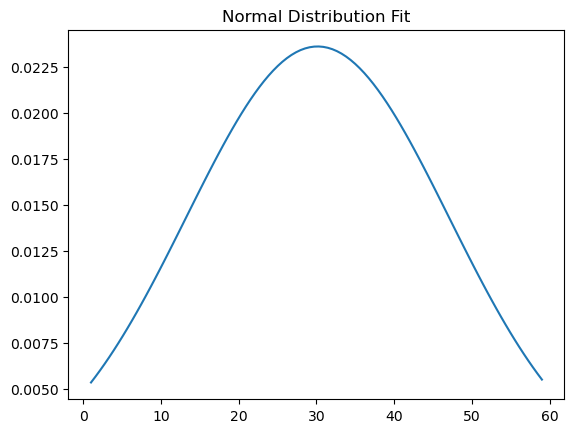

In [15]:

x = np.linspace(df["time_spent_minutes"].min(), df["time_spent_minutes"].max(), 100)
plt.plot(x, stats.norm.pdf(x, df["time_spent_minutes"].mean(), df["time_spent_minutes"].std()))
plt.title("Normal Distribution Fit")
plt.show()
